In [1]:
import pandas as pd
import re
import string
# from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [3]:
data_df = pd.read_csv("../rtgender/facebook_congress_posts.csv")

In [4]:
data_df.head()

,op_id,op_gender,post_id,post_text,post_type
0,57265377,M,0,"Yesterday, my colleagues and I voted to protec...",video
1,57265377,M,1,Roses are red...and so is Texas. Let's keep it...,video
2,57265377,M,2,#TBT to this classic video. #DonkeyWhisperer,video
3,57265377,M,3,Since President Donald J. Trump was sworn in o...,video
4,57265377,M,4,Remembering our 40th president today. LIKE to ...,video


In [5]:
data_df1 = data_df.copy()

In [6]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stopwords = False, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

#     # Remove line breaks
#     text = re.sub(r'\n', '', text)

#     # Remove puncuation
#     translator = str.maketrans('', '', string.punctuation)
#     text = text.translate(translator)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S+www\S+', '', text)
    
    
    # Remove stop words
    text = text.split()
    text_filtered = text
    if stopwords == True:
        useless_words = nltk.corpus.stopwords.words("english")
#         useless_words = useless_words + ['hi', 'im']

        text_filtered = [word for word in text if not word in useless_words]

        # Remove numbers
        text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
#     else:
#         text_filtered = text
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [7]:
data_df2 = data_df.copy()


In [8]:
data_df2['post_text'] = data_df2['post_text'].astype(str)

In [9]:
data_df2['post_text_cleaned'] = data_df2['post_text'].apply(lambda x: clean_string(x, stopwords = True, stem='Lem'))


In [10]:
data_df2['post_text_cleaned']

0         yesterday, colleague voted protect state's rig...
1         rose red...and texas. let's keep way. happy va...
2                      #tbt classic video. #donkeywhisperer
3         since president donald j. trump sworn january ...
4         remembering  president today. like help wish p...
                                ...                        
548336    watch interview fox business' money breakfast ...
548337                            looking forward baseball.
548338                          casting vote floor u house.
548339    headed fox news studio dc appear money breakfa...
548340                                                  nan
Name: post_text_cleaned, Length: 548341, dtype: object

In [11]:
data_df2['post_text_cleaned1'] = data_df2['post_text_cleaned'].str.split()

In [12]:
data_df2['post_text_cleaned1']

0         [yesterday,, colleague, voted, protect, state'...
1         [rose, red...and, texas., let's, keep, way., h...
2                 [#tbt, classic, video., #donkeywhisperer]
3         [since, president, donald, j., trump, sworn, j...
4         [remembering, president, today., like, help, w...
                                ...                        
548336    [watch, interview, fox, business', money, brea...
548337                        [looking, forward, baseball.]
548338                    [casting, vote, floor, u, house.]
548339    [headed, fox, news, studio, dc, appear, money,...
548340                                                [nan]
Name: post_text_cleaned1, Length: 548341, dtype: object

In [13]:
data_df2['post_text_cleaned']

0         yesterday, colleague voted protect state's rig...
1         rose red...and texas. let's keep way. happy va...
2                      #tbt classic video. #donkeywhisperer
3         since president donald j. trump sworn january ...
4         remembering  president today. like help wish p...
                                ...                        
548336    watch interview fox business' money breakfast ...
548337                            looking forward baseball.
548338                          casting vote floor u house.
548339    headed fox news studio dc appear money breakfa...
548340                                                  nan
Name: post_text_cleaned, Length: 548341, dtype: object

In [14]:
data_df2.to_csv("./preprocessed_data/facebook_congress_posts_preprocssed_lem_stopwords_removal.csv")

In [15]:
all_words1 = ''
all_words = data_df2.groupby(['op_gender']).agg({'post_text_cleaned': ' '.join}).reset_index()
print(all_words)


  op_gender                                  post_text_cleaned
0         M  yesterday, colleague voted protect state's rig...
1         W  we've seen flint, michigan. we've seen dakota ...


In [16]:



all_words[all_words['op_gender']=='M']['post_text_cleaned']

0    yesterday, colleague voted protect state's rig...
Name: post_text_cleaned, dtype: object

In [17]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_M = FreqDist(all_words[all_words['op_gender']=='M']['post_text_cleaned'][0].split())
# fd_wct1_M

In [18]:
fd_wct1_F = FreqDist(all_words[all_words['op_gender']=='W']['post_text_cleaned'].values[0].split(" "))


In [19]:
print(fd_wct1_M.most_common(40))


[('american', 39605), ('house', 36895), ('today', 36166), ('great', 36085), ('new', 33967), ('state', 32525), ('president', 31463), (',', 30893), ('nan', 29613), ('time', 27180), ('bill', 27034), ('-', 26138), ('day', 25320), ('one', 25103), ('help', 24784), ('need', 24764), ('work', 24636), ('national', 24205), ('would', 23026), ('family', 22635), ('make', 22428), ('year', 22218), ('u', 22143), ('people', 21877), ('job', 21778), ('health', 21604), ('federal', 21494), ('u.s.', 21398), ('support', 21149), ('congress', 21007), ('last', 20713), ('veteran', 20581), ('like', 20217), ('.', 19827), ('service', 19445), ('thank', 19123), ('get', 18793), ('government', 18342), ('business', 17524), ('many', 17420)]


In [20]:
print(fd_wct1_F.most_common(40))


[('', 42305), ('today', 14374), ('american', 13355), ('new', 13232), ('great', 12842), ('house', 12117), ('woman', 11281), ('work', 10718), ('family', 10639), ('state', 10171), ('health', 10160), (',', 9925), ('time', 9794), ('day', 9775), ('help', 9772), ('need', 9658), ('president', 9425), ('make', 9232), ('one', 8801), ('people', 8663), ('nan', 8610), ('support', 8480), ('u', 8462), ('national', 8385), ('year', 8323), ('community', 8245), ("i'm", 8163), ('-', 8116), ('bill', 7858), ('congress', 7608), ('many', 7543), ('right', 7414), ('care', 7360), ('last', 7116), ('would', 7096), ('get', 6994), ('service', 6990), ('thank', 6930), ('job', 6920), ('must', 6816)]


In [21]:
fd_wct1_M

FreqDist({'american': 39605, 'house': 36895, 'today': 36166, 'great': 36085, 'new': 33967, 'state': 32525, 'president': 31463, ',': 30893, 'nan': 29613, 'time': 27180, ...})

In [22]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [23]:
print(features[:30])

['___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '___________' '____________' '_____________'
 '_______________' '___________________' '______________________'
 '_______________________' '_________________________'
 '___________________________' '_____________________________'
 '_________________________________'
 '_____________________________________'
 '______________________________________'
 '_______________________________________'
 '__________________________________________'
 '____________________________________________'
 '______________________________________________'
 '_______________________________________________'
 '________________________________________________'
 '_________________________________________________'
 '__________________________________________________'
 '____________________________________________________']


In [24]:
X.shape, len(y), len(features)

((548341, 125322), 548341, 125322)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.64198128 0.35801872]
 [0.8941385  0.1058615 ]]


In [27]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [28]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.809596 using {'C': 1.0, 'penalty': 'l2'}
0.805013 (0.001383) with: {'C': 100, 'penalty': 'l2'}
0.806360 (0.001812) with: {'C': 10, 'penalty': 'l2'}
0.809596 (0.000919) with: {'C': 1.0, 'penalty': 'l2'}
0.802786 (0.001299) with: {'C': 0.1, 'penalty': 'l2'}
0.780162 (0.000678) with: {'C': 0.01, 'penalty': 'l2'}


In [29]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.8108569628577587


In [30]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.8306528236991215


In [31]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [32]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,0.036571,___
1,-0.119654,____
2,-0.012539,_____
3,-0.033923,______
4,0.000000,_______
...,...,...
125317,0.112560,𝗼𝗻𝗲
125318,0.112560,𝗼𝗽𝗽𝗼𝗻𝗲𝗻𝘁𝘀
125319,0.112560,𝗼𝘂𝗿
125320,0.112560,𝗼𝘄𝗻


In [33]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
85003,0.000000,platou
81229,0.000000,pacifici
25079,0.000000,cuck
25078,0.000000,cucina
25072,0.000000,cuca
...,...,...
109501,5.710055,teamtulsi
103050,5.910149,sofla
99921,6.395966,shaheen
117563,6.448768,ventura


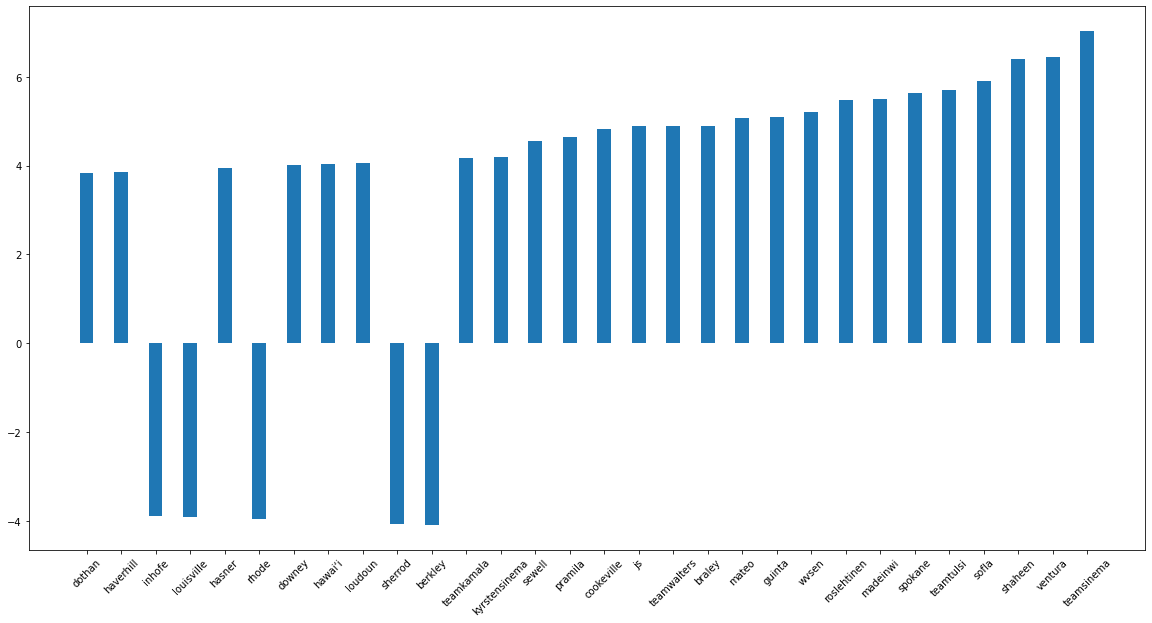

In [34]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [35]:
# visualize most freuquent words

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [37]:
print(features[:30])

['___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '___________' '____________' '_____________'
 '_______________' '___________________' '______________________'
 '_______________________' '_________________________'
 '___________________________' '_____________________________'
 '_________________________________'
 '_____________________________________'
 '______________________________________'
 '_______________________________________'
 '__________________________________________'
 '____________________________________________'
 '______________________________________________'
 '_______________________________________________'
 '________________________________________________'
 '_________________________________________________'
 '__________________________________________________'
 '____________________________________________________']


In [38]:
X.shape, len(y), len(features)

((548341, 125322), 548341, 125322)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.7611388  0.2388612 ]
 [0.94834874 0.05165126]]


In [41]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [42]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.809700 using {'C': 10, 'penalty': 'l2'}
0.807841 (0.001175) with: {'C': 100, 'penalty': 'l2'}
0.809700 (0.001926) with: {'C': 10, 'penalty': 'l2'}
0.805644 (0.001162) with: {'C': 1.0, 'penalty': 'l2'}
0.775894 (0.000702) with: {'C': 0.1, 'penalty': 'l2'}
0.754341 (0.000105) with: {'C': 0.01, 'penalty': 'l2'}


In [43]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.8110835410299913


In [44]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.8255100384614683


In [45]:
grid_result.best_params_

{'C': 10, 'penalty': 'l2'}

In [46]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,-0.125144,___
1,-0.251532,____
2,-0.044628,_____
3,-0.104494,______
4,0.000000,_______
...,...,...
125317,0.185137,𝗼𝗻𝗲
125318,0.185137,𝗼𝗽𝗽𝗼𝗻𝗲𝗻𝘁𝘀
125319,0.185137,𝗼𝘂𝗿
125320,0.185137,𝗼𝘄𝗻


In [47]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
34592,0.000000,entourage
29174,0.000000,dilorenzo
101426,0.000000,silerio
101432,0.000000,silhueta
74110,0.000000,naaman
...,...,...
67788,-19.298844,maryland
104218,20.196380,spokane
113924,20.797732,tulsi
117563,24.934555,ventura


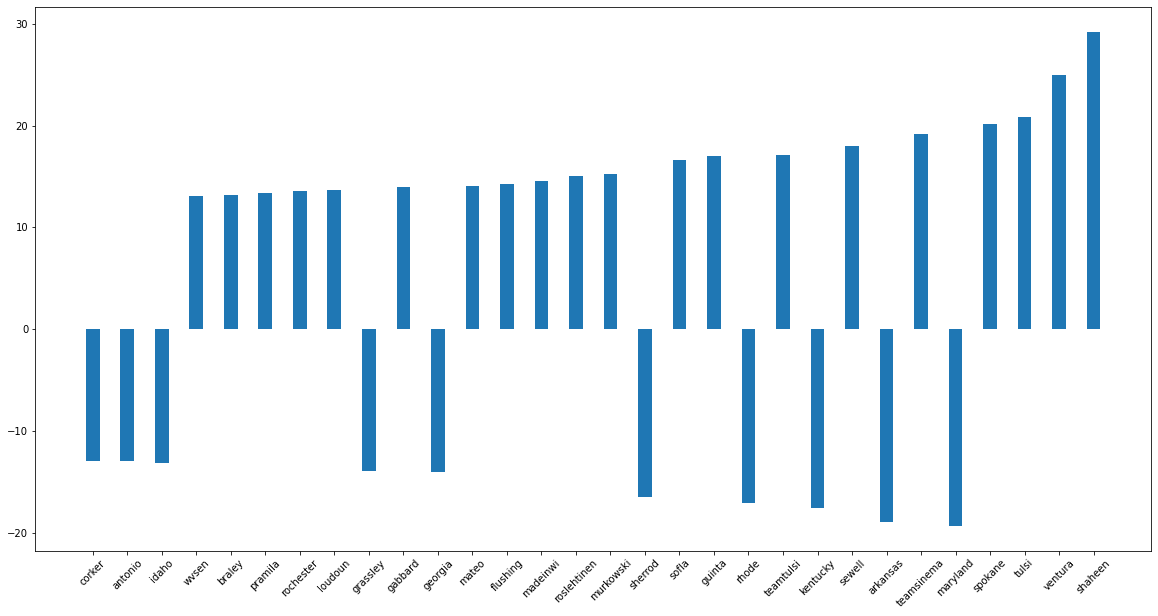

In [48]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [49]:
# visualize most freuquent words 

In [50]:
df_M = pd.DataFrame(fd_wct1_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_M = sum(fd_wct1_M.values())
df_M['total_words'] = total_words_M
df_M['gender'] ='M'
df_M

,word,n,total_words,gender
0,"yesterday,",3726,9520329,M
1,colleague,7258,9520329,M
2,voted,8752,9520329,M
3,protect,10177,9520329,M
4,state's,1366,9520329,M
...,...,...,...,...
273346,amused.,1,9520329,M
273347,impor,1,9520329,M
273348,c-span...,1,9520329,M
273349,handlig,1,9520329,M


In [51]:
df_F = pd.DataFrame(fd_wct1_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_F = sum(fd_wct1_F.values())
df_F['total_words'] = total_words_F
df_F['gender'] ='W'
df_F

,word,n,total_words,gender
0,we've,1227,3376608,W
1,seen,658,3376608,W
2,"flint,",57,3376608,W
3,michigan.,84,3376608,W
4,dakota,537,3376608,W
...,...,...,...,...
144863,sexting,1,3376608,W
144864,"profits.""",1,3376608,W
144865,"port-au-prince,",1,3376608,W
144866,preval,1,3376608,W


In [52]:
df_all_for_R = pd.concat([df_M, df_F])
df_all_for_R

,word,n,total_words,gender
0,"yesterday,",3726,9520329,M
1,colleague,7258,9520329,M
2,voted,8752,9520329,M
3,protect,10177,9520329,M
4,state's,1366,9520329,M
...,...,...,...,...
144863,sexting,1,3376608,W
144864,"profits.""",1,3376608,W
144865,"port-au-prince,",1,3376608,W
144866,preval,1,3376608,W


In [53]:
df_all_for_R.to_csv("./preprocessed_data/facebook_congress_posts_preprocressed_for_R.csv")

In [ ]:
# after running R codes for weighted log odds

In [54]:
weighted_log_odds_df = pd.read_csv("./preprocessed_data/facebook_congress_post_weighted_log_odds.csv")
weighted_log_odds_df.sort_values(['log_odds_weighted'], inplace=True)

In [55]:
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
1805,1806,1805,woman,12499,9520329,M,-21.376977
5303,5304,5303,congresswoman,920,9520329,M,-19.087455
58996,58997,58996,shaheen,23,9520329,M,-15.536354
1794,1795,1794,women's,2397,9520329,M,-14.682693
24815,24816,24815,hampshire,188,9520329,M,-14.384317
...,...,...,...,...,...,...,...
280616,280617,7265,women's,3140,3376608,W,17.117177
278021,278022,4670,-teamtulsi,384,3376608,W,17.166722
274013,274014,662,congresswoman,2739,3376608,W,21.381374
273519,273520,168,woman,11281,3376608,W,25.447978


In [56]:
weighted_log_odds_df = weighted_log_odds_df.dropna()
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
1805,1806,1805,woman,12499,9520329,M,-21.376977
5303,5304,5303,congresswoman,920,9520329,M,-19.087455
58996,58997,58996,shaheen,23,9520329,M,-15.536354
1794,1795,1794,women's,2397,9520329,M,-14.682693
24815,24816,24815,hampshire,188,9520329,M,-14.384317
...,...,...,...,...,...,...,...
299991,299992,26640,shaheen,1067,3376608,W,16.583014
280616,280617,7265,women's,3140,3376608,W,17.117177
278021,278022,4670,-teamtulsi,384,3376608,W,17.166722
274013,274014,662,congresswoman,2739,3376608,W,21.381374


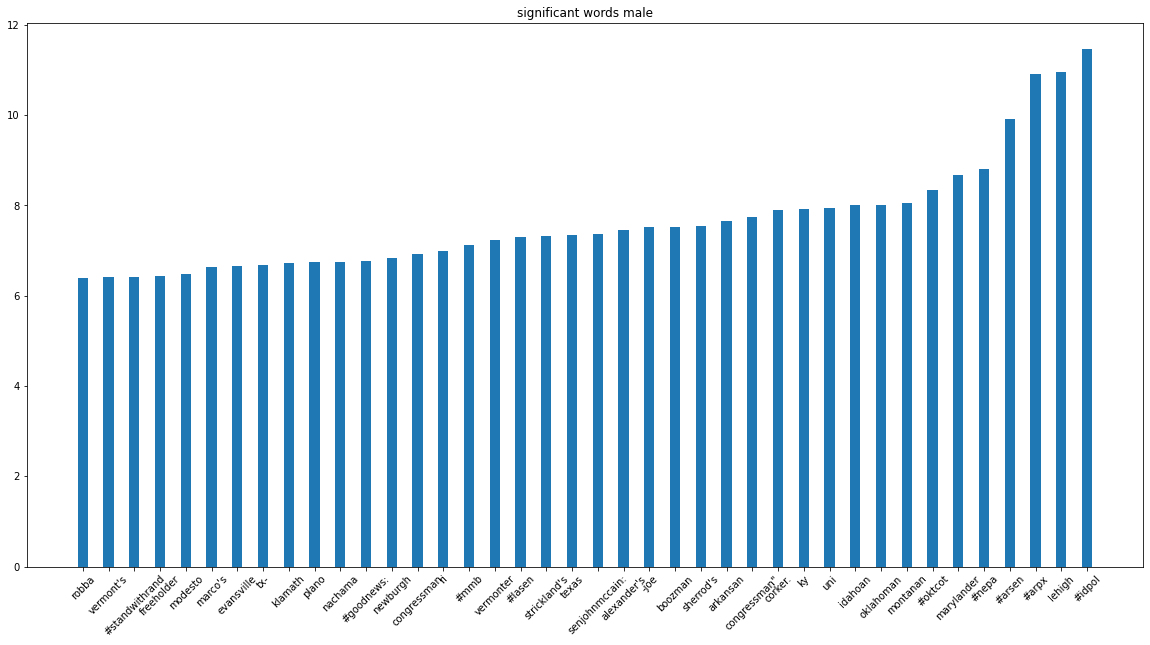

In [57]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words male")
plt.xticks(rotation=45)
plt.show()

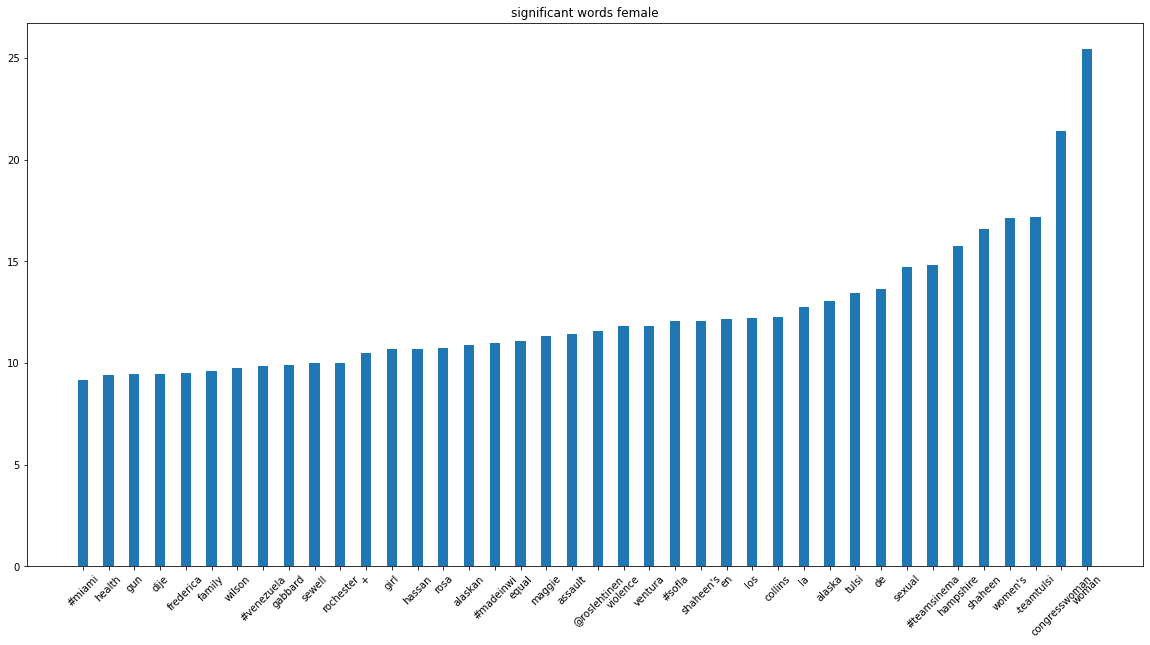

In [58]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='W']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words female")
plt.xticks(rotation=45)
plt.show()